In [1]:
%matplotlib inline
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
df = pd.DataFrame([[2015, 1, 1],
                    [2015, 1, 1],
                    [2015, 1, 2],
                    [2015, 1, 2],
                    [2015, 1, 2],
                    [2015, 2, 1],
                    [2015, 2, 1],
                    [2015, 2, 1],
                    [2015, 2, 2],
                    [2015, 2, 2]], columns = ['year', 'month', 'class'])
df

,year,month,class
0,2015,1,1
1,2015,1,1
2,2015,1,2
3,2015,1,2
4,2015,1,2
5,2015,2,1
6,2015,2,1
7,2015,2,1
8,2015,2,2
9,2015,2,2


In [10]:
df.groupby(['year', 'month', 'class'])

year  month  class
2015  1      1        2
             2        3
      2      1        3
             2        2
dtype: int64

In [11]:
df.groupby(['year', 'month', 'class']).size()

year  month  class
2015  1      1        2
             2        3
      2      1        3
             2        2
dtype: int64

In [14]:
df_gb = df.groupby(['year', 'month', 'class']).size().unstack(level=1)
df_gb

month       1  2
year class      
2015 1      2  3
     2      3  2

<AxesSubplot:xlabel='year,month'>

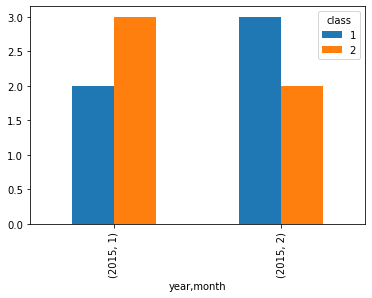

In [6]:
df_gb.plot(kind = 'bar')

### Test 2
https://stackoverflow.com/questions/59922701/pandas-how-can-i-group-a-stacked-bar-chart

In [40]:
df = pd.DataFrame(columns=['Context', 'Parameter', 'Val1', 'Val2', 'Val3'],
                  data=[['Total', 1, 43.312347, 9.507902, 1.580367],
                        ['Total', 2, 42.862649, 9.482205, 1.310549],
                        ['Total', 3, 43.710651, 9.430811, 1.400488],
                        ['Total', 4, 43.209559, 9.803418, 1.349094],
                        ['Total', 5, 42.541436, 10.008994, 1.220609],
                        ['Total', 6, 42.978286, 9.430811, 1.336246],
                        ['Total', 7, 42.734164, 10.317358, 1.606064],
                        ['User', 1, 47.652348, 11.138861, 2.297702],
                        ['User', 2, 47.102897, 10.589411, 1.848152],
                        ['User', 3, 46.853147, 10.139860, 1.848152],
                        ['User', 4, 47.252747, 11.138861, 1.748252],
                        ['User', 5, 45.954046, 10.239760, 1.448551],
                        ['User', 6, 46.353646, 10.439560, 1.498501],
                        ['User', 7, 47.102897, 11.338661, 1.998002]])


In [41]:
df

,Context,Parameter,Val1,Val2,Val3
0,Total,1,43.312347,9.507902,1.580367
1,Total,2,42.862649,9.482205,1.310549
2,Total,3,43.710651,9.430811,1.400488
3,Total,4,43.209559,9.803418,1.349094
4,Total,5,42.541436,10.008994,1.220609
5,Total,6,42.978286,9.430811,1.336246
6,Total,7,42.734164,10.317358,1.606064
7,User,1,47.652348,11.138861,2.297702
8,User,2,47.102897,10.589411,1.848152
9,User,3,46.853147,10.139860,1.848152


In [42]:
df.set_index(['Context', 'Parameter'], inplace=True)
df

Val1       Val2      Val3
Context Parameter                                
Total   1          43.312347   9.507902  1.580367
        2          42.862649   9.482205  1.310549
        3          43.710651   9.430811  1.400488
        4          43.209559   9.803418  1.349094
        5          42.541436  10.008994  1.220609
        6          42.978286   9.430811  1.336246
        7          42.734164  10.317358  1.606064
User    1          47.652348  11.138861  2.297702
        2          47.102897  10.589411  1.848152
        3          46.853147  10.139860  1.848152
        4          47.252747  11.138861  1.748252
        5          45.954046  10.239760  1.448551
        6          46.353646  10.439560  1.498501
        7          47.102897  11.338661  1.998002

In [43]:
df0 = df.reorder_levels(['Parameter', 'Context']).sort_index()
df0

Val1       Val2      Val3
Parameter Context                                
1         Total    43.312347   9.507902  1.580367
          User     47.652348  11.138861  2.297702
2         Total    42.862649   9.482205  1.310549
          User     47.102897  10.589411  1.848152
3         Total    43.710651   9.430811  1.400488
          User     46.853147  10.139860  1.848152
4         Total    43.209559   9.803418  1.349094
          User     47.252747  11.138861  1.748252
5         Total    42.541436  10.008994  1.220609
          User     45.954046  10.239760  1.448551
6         Total    42.978286   9.430811  1.336246
          User     46.353646  10.439560  1.498501
7         Total    42.734164  10.317358  1.606064
          User     47.102897  11.338661  1.998002

In [44]:

df0 = df0.unstack(level=-1) # unstack the 'Context' column
df0

Val1                  Val2                 Val3          
Context        Total       User      Total       User     Total      User
Parameter                                                                
1          43.312347  47.652348   9.507902  11.138861  1.580367  2.297702
2          42.862649  47.102897   9.482205  10.589411  1.310549  1.848152
3          43.710651  46.853147   9.430811  10.139860  1.400488  1.848152
4          43.209559  47.252747   9.803418  11.138861  1.349094  1.748252
5          42.541436  45.954046  10.008994  10.239760  1.220609  1.448551
6          42.978286  46.353646   9.430811  10.439560  1.336246  1.498501
7          42.734164  47.102897  10.317358  11.338661  1.606064  1.998002

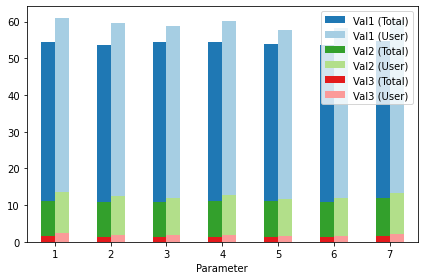

In [46]:
colors = plt.cm.Paired.colors

fig, ax = plt.subplots()
(df0['Val1']+df0['Val2']+df0['Val3']).plot(kind='bar', color=[colors[1], colors[0]], rot=0, ax=ax)
(df0['Val2']+df0['Val3']).plot(kind='bar', color=[colors[3], colors[2]], rot=0, ax=ax)
df0['Val3'].plot(kind='bar', color=[colors[5], colors[4]], rot=0, ax=ax)

legend_labels = [f'{val} ({context})' for val, context in df0.columns]
ax.legend(legend_labels)

plt.tight_layout()
plt.show()
